# Correlações
**Objetivo da aula**: ao fim desta aula, o aluno será capaz de encontrar correlações entre variáveis para gerar decisões e planejamentos baseados em evidências.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

# Texto introdutório

Em muitas situações, dizemos que "quanto mais X, mais Y". Um exemplo disso é quando pensamos que "quanto mais tempo de estudo, melhor o desempenho na prova". Para fins de exemplo, inventei os dados abaixo:

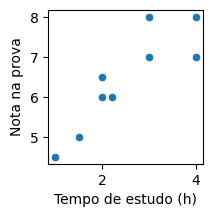

In [ ]:
df = pd.DataFrame()
df['Tempo de estudo (h)'] = [1.5, 2.2, 3, 4, 3, 2, 2, 1, 4]
df['Nota na prova'] = [5, 6, 7,7, 8, 6, 6.5, 4.5, 8]
plt.figure(figsize=(2,2))
sns.scatterplot(data=df, x='Tempo de estudo (h)', y='Nota na prova')
plt.show()



O gráfico que foi desenhado na tela é um "gráfico de espalhamento", ou "scatterplot". Nele, cada ponto é um aluno, e sua posição indica o tempo de estudo (no eixo X) e a nota na prova (eixo Y). Veja que, embora os pontos não formem uma reta perfeita, eles se parecem mais com uma reta que se fossem pontos aleatórios!

A força dessa associação do crescimento de uma variável ao crescimento da outra variável é chamado de *correlação*. A correlação é calculada por:

$$
 r_{xy} = \sum_{i=1}^N \frac{ (x_i-\mu_x) (y_i-\mu_y) }{N \sigma_x \sigma_y}  
$$, 
onde:

* $N$ é o número de elementos nas séries $x$ e $y$ .
* $\mu_x$ e $\mu_y$ representam as médias das séries $x$ e $y$,
* $\sigma_x$ e $\sigma_y$ representam os desvios padrões das séries $x$ e $y$

Embora a equação seja essa, nós não a implementaremos manualmente. Ao invés disso, usaremos `pandas` para gerar um novo DataFrame que contém as correlações que queremos:

In [ ]:
rxy = df.corr()
print(rxy)
print( "Correlação:", rxy.loc['Nota na prova']['Tempo de estudo (h)'])

# avalia se/quanto um ponto reflete sobre o outro, ou seja, se eles tem relação entre si

# quando a correlação = 1 significa que quando um sobe o outro sobe 
# quando a correlação = -1 significa que quando um sobe o outro desce 
# quando a correlação = 0 (ou próximo de 0) não apresentam relação


                     Tempo de estudo (h)  Nota na prova
Tempo de estudo (h)             1.000000       0.875608
Nota na prova                   0.875608       1.000000
Correlação: 0.8756084675952558


A correlação pode assumir valores entre 1 e -1. Se está próxima de 1, significa que a associação é forte e quando um fenômeno aumenta, o outro também aumenta. Se é próxima de -1, a associação também é forte, mas, quando um fenômeno aumenta, o outro diminui. Se está próxima de zero, isso significa que as variáveis medidas têm associação fraca, ou que são *descorrelacionadas*. Embora haja alguns manuais com níveis de correlação e possíveis interpretações, o uso adequado desta ferramenta depende do contexto em que a interpretação é feita.

Sob um ponto de vista estritamente científico, temos as seguintes situações:

* Se $r_{xy}$ está próximo de 1 ou -1, é *possível* que haja algum tipo de associação entre os fenômenos medidos.
* Se $r_{xy}$ está muito próximo de 0, então seus dados indicam que não há nenhum tipo de associação entre os fenômenos medidos.

# Exercício 1
*Objetivo: usar scatterplot e correlação para julgar uma hipótese*

Usando um *scatterplot* e uma medida de correlação, use dados do Banco Mundial para discutir a seguinte afirmação:

*Os países que são mais ricos em 2020 são os mesmos países que já eram os mais ricos em 1980!*

<strong>Não, pois os países que estão mais avantajados no eixo x (1980) não estão no eixo y (2020)</strong>

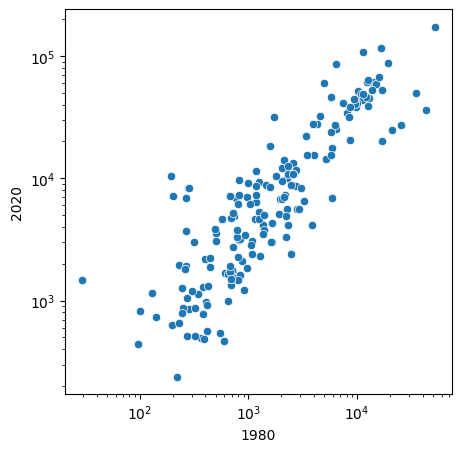

In [ ]:
# Resolva seu exercício aqui
df_pib_per_capita = pd.read_csv('dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv', skiprows=3)

df = pd.DataFrame()
df['1980'] = df_pib_per_capita["1980"]
df['2020'] = df_pib_per_capita["2020"]

plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='1980', y='2020')
plt.semilogx()
plt.semilogy()
plt.show()




In [ ]:
df_pib_per_capita[["1980", "2020"]].corr()

,1980,2020
1980,1.000000,0.784065
2020,0.784065,1.000000


# Exercício 2
*Objetivo: usar dados de múltiplas tabelas para discutir uma hipótese*

O desmatamento é um problema ligado ao desenvolvimento sustentável de países. É comum ouvirmos dizer que os países mais ricos do mundo já devastaram suas próprias florestas e, portanto, o desmatamento é um caminho inevitável para o progresso de um país.

Os dataframes abaixo carregam dados do Banco Mundial referentes ao PIB per capita e à porcentagem de área coberta por florestas de cada país.

O problema agora é que temos dados relevantes, relacionados aos mesmos países, mas em dataframes diferentes! Por isso, será necessário usar o método `merge` (veja o [tutorial em vídeo aqui](https://youtu.be/MyPKZazh4C4)).

Use esses dados para gerar um scatterplot e calcular correlações para discutir a hipótese:

*Em 2020, quanto mais rico é um país, menor é sua área coberta por florestas*

In [8]:
df_area_florestal = pd.read_csv('dados/WorldBank/API_AG.LND.FRST.ZS_DS2_en_csv_v2_3731376.csv', skiprows=3)
df_pib_per_capita = pd.read_csv('dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv', skiprows=3)

# on = argumento que será o fator de semelhanca entre os dfs 
df_corr = pd.merge(left=df_area_florestal, right=df_pib_per_capita, on="Country Name", suffixes=["_floresta", "_ppc"])
df_ = df_corr[["2020_ppc", "2020_floresta"]]

df_.corr()
# ˆ baixo corr => significa que não existe relação entre ter um x pib e area florestal

# t_df = pd.DataFrame()

# t_df["2020_floresta"] = df_area_florestal["2020"]
# t_df["2020_ppc"] = df_pib_per_capita["2020"]

# t_df.corr()

,2020_ppc,2020_floresta
2020_ppc,1.000000,0.001981
2020_floresta,0.001981,1.000000


# Exercício 3
*Objetivo: comparar correlações de analisar hipóteses sobre diferentes comportamentos*

Podemos argumentar que a análise feita no exercício 2 é incompleta porque considera apenas um ano. Talvez o que tenha acontecido é que os países que já eram cheios de florestas continuaram cheios de florestas e os que não tinham florestas continuaram assim, ou talvez os países ricos tenham simplesmente tido mais recursos para reflorestar seus territórios. Por isso, deveríamos analisar os dados históricos relacionando PIB *per capita* e taxa de florestamento para cada país.

1. Para cada país em nosso conjunto de dados, calcule a correlação entre o PIB per capita e a área florestada.
1. Faça um histograma das correlações encontradas e calcule sua média e desvio padrão. Quais são os comportamentos típicos encontrados?
1. Faça a mesma análise, agora comparando os 20% de países mais pobres aos 20% mais ricos. Quais são as diferenças evidenciadas?
1. Faça a mesma análise, agora comparando os 20% de países mais cobertos de florestas aos 20% menos cobertos de florestas. Quais são as diferenças evidenciadas? 

In [ ]:
df_area_florestal = pd.read_csv('dados/WorldBank/API_AG.LND.FRST.ZS_DS2_en_csv_v2_3731376.csv', skiprows=3).set_index('Country Name')
df_pib_per_capita = pd.read_csv('dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv', skiprows=3).set_index('Country Name')

columns = [ str(i) for i in range(1960, 2020)]

df1 = df_area_florestal.loc["Brazil"][columns]
df2 = df_pib_per_capita.loc["Brazil"][columns]

df_ = pd.DataFrame()

df_["Area"] = df1
df_["Pib"] = df2


df_.corr(numeric_only=False)

# significa que ao passo que o um sobe o outro cai, ou seja, se o pib sobe a area cai ou vice-versa

,Area,Pib
Area,1.00000,-0.84288
Pib,-0.84288,1.00000
